#**Bank currency note authenticity**

#Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#Importación y exploración de datos

In [ ]:
bankdata = pd.read_csv('bill_authentication.csv')

print(bankdata.shape)
bankdata.head()

(1372, 5)
[-8.5482, 2.4495]


In [ ]:
# sns.pairplot(bankdata,hue='Class',palette='deep');

#Preprocesamiento de los datos
Dividir los datos en atributos y etiquetas

In [ ]:
X = bankdata.drop('Class', axis=1)
Y = bankdata['Class']

Dividir los datos en training set y testing set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

#Entrenamiento





In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

SVC(kernel='linear')

#Evaluación del algoritmo

In [ ]:
Y_pred = svclassifier.predict(X_test)

print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[151   2]
 [  1 121]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.98      0.99      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



#Predicciones

In [ ]:
casosPredBank = [[-2.6816, 2.2705, -4.7744, -4.5071], [-5.2444, -12.4794, 5.2295, 2.5895], [-3.0121, -5.6236, 2.7546, -4.2965], [0.4770, -10.4650, 16.9953, 0.4446], [5.0343, -3.2536, 5.0923, -5.8218]]
casosPredBank = pd.DataFrame(casosPredBank, index=range(1,6))
casosPredBank.columns = X.columns
Predicciones = svclassifier.predict(casosPredBank)
casosPredBank['Predicción'] = Predicciones
casosPredBank

,Variance,Skewness,Curtosis,Entropy,Predicción
1,-2.6816,2.2705,-4.7744,-4.5071,1
2,-5.2444,-12.4794,5.2295,2.5895,1
3,-3.0121,-5.6236,2.7546,-4.2965,1
4,0.4770,-10.4650,16.9953,0.4446,0
5,5.0343,-3.2536,5.0923,-5.8218,0


#**Category of plants in iris dataset**

#Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#Importación y exploración de datos

In [ ]:
irisdata = pd.read_csv('Iris.csv', index_col = 'Id')

print(irisdata.shape)
irisdata.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


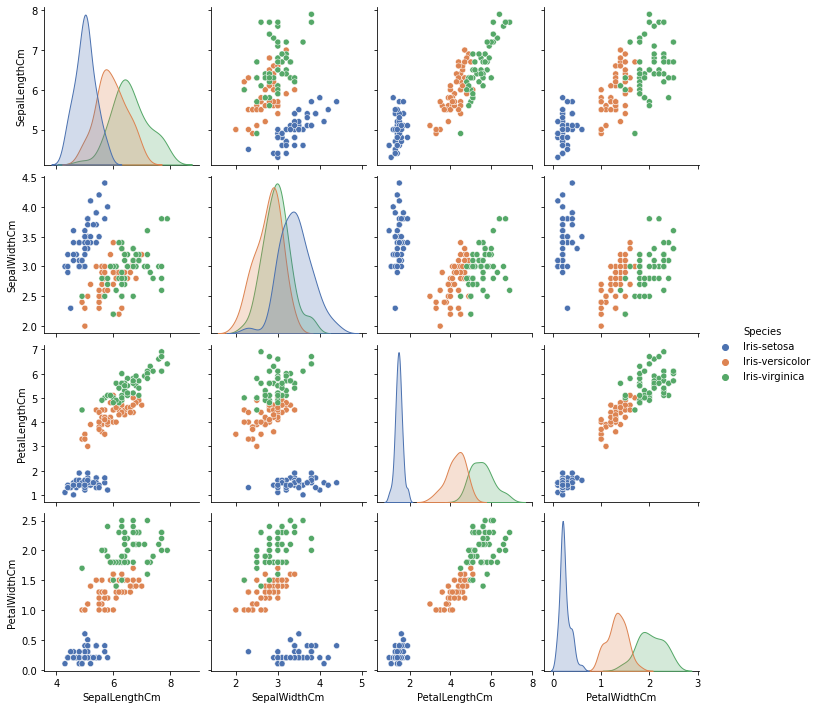

In [ ]:
sns.pairplot(irisdata,hue='Species',palette='deep');

#Preprocesamiento de los datos
Dividir los datos en atributos y etiquetas

In [ ]:
X = irisdata.drop('Species', axis=1)
Y = irisdata['Species']

Dividir los datos en training set y testing set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

#1. Polynomial Kernel


**Entrenamiento**

In [ ]:
svclassifierPoly = SVC(kernel='poly', degree=8)
svclassifierPoly.fit(X_train, Y_train)

SVC(degree=8, kernel='poly')

**Evaluación del algoritmo**

In [ ]:
Y_pred = svclassifierPoly.predict(X_test)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[6 0 0]
 [0 9 0]
 [0 6 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.60      1.00      0.75         9
 Iris-virginica       1.00      0.60      0.75        15

       accuracy                           0.80        30
      macro avg       0.87      0.87      0.83        30
   weighted avg       0.88      0.80      0.80        30



**Predicciones**

In [ ]:
casosPredIris = [[4.5, 2.7, 1.5, 1.0], [6.4, 4.0, 3.1, 2.1], [5.0, 2.5, 6.0, 1.5], [4.4, 4.4, 3.7, 1.4], [6.5, 4.1, 2.4, 0.2]]
casosPredIris = pd.DataFrame(casosPredIris, index=range(1,6))
casosPredIris.columns = X.columns
Predicciones = svclassifierPoly.predict(casosPredIris)
casosPredIris['Predicción'] = Predicciones
casosPredIris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicción
1,4.5,2.7,1.5,1.0,Iris-setosa
2,6.4,4.0,3.1,2.1,Iris-virginica
3,5.0,2.5,6.0,1.5,Iris-versicolor
4,4.4,4.4,3.7,1.4,Iris-versicolor
5,6.5,4.1,2.4,0.2,Iris-setosa


#2. Gaussian Kernel

**Entrenamiento**

In [ ]:
svclassifierGaussian = SVC(kernel='rbf')
svclassifierGaussian.fit(X_train, Y_train)

SVC()

**Evaluación del algoritmo**

In [ ]:
Y_pred = svclassifierGaussian.predict(X_test)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



**Predicciones**

In [ ]:
casosPredIris = [[4.5, 2.7, 1.5, 1.0], [6.4, 4.0, 3.1, 2.1], [5.0, 2.5, 6.0, 1.5], [4.4, 4.4, 3.7, 1.4], [6.5, 4.1, 2.4, 0.2]]
casosPredIris = pd.DataFrame(casosPredIris, index=range(1,6))
casosPredIris.columns = X.columns
Predicciones = svclassifierGaussian.predict(casosPredIris)
casosPredIris['Predicción'] = Predicciones
casosPredIris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicción
1,4.5,2.7,1.5,1.0,Iris-setosa
2,6.4,4.0,3.1,2.1,Iris-versicolor
3,5.0,2.5,6.0,1.5,Iris-virginica
4,4.4,4.4,3.7,1.4,Iris-versicolor
5,6.5,4.1,2.4,0.2,Iris-setosa


#3. Sigmoid Kernel

**Entrenamiento**

In [ ]:
svclassifierSigmoid = SVC(kernel='sigmoid')
svclassifierSigmoid.fit(X_train, Y_train)

SVC(kernel='sigmoid')

**Evaluación del algoritmo**

In [ ]:
Y_pred = svclassifierSigmoid.predict(X_test)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 0  0 10]
 [ 0  0 12]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        10
Iris-versicolor       0.00      0.00      0.00        12
 Iris-virginica       0.27      1.00      0.42         8

       accuracy                           0.27        30
      macro avg       0.09      0.33      0.14        30
   weighted avg       0.07      0.27      0.11        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Predicciones**

In [ ]:
casosPredIris = [[4.5, 2.7, 1.5, 1.0], [6.4, 4.0, 3.1, 2.1], [5.0, 2.5, 6.0, 1.5], [4.4, 4.4, 3.7, 1.4], [6.5, 4.1, 2.4, 0.2]]
casosPredIris = pd.DataFrame(casosPredIris, index=range(1,6))
casosPredIris.columns = X.columns
Predicciones = svclassifierSigmoid.predict(casosPredIris)
casosPredIris['Predicción'] = Predicciones
casosPredIris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicción
1,4.5,2.7,1.5,1.0,Iris-virginica
2,6.4,4.0,3.1,2.1,Iris-virginica
3,5.0,2.5,6.0,1.5,Iris-virginica
4,4.4,4.4,3.7,1.4,Iris-virginica
5,6.5,4.1,2.4,0.2,Iris-virginica
